In [3]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import os
%matplotlib inline

In [4]:
DATA_LABEL_PATH = '/Users/benjaminkhuong/Downloads/Air_Force_1_labels/'
LABEL_PATHS = os.listdir(DATA_LABEL_PATH)[1:]

In [5]:
imgs = [] 

for label in LABEL_PATHS:
    tree = ET.parse(os.path.join(DATA_LABEL_PATH,label))
    root = tree.getroot()
    s = ET.tostring(root, encoding='utf8').decode('utf8')
    tree = ET.fromstring(s)
    file = tree.find('path').text
    bboxes = []
    for object_ in tree.findall('object'):
        xmin = object_.find('bndbox/xmin').text
        xmax = object_.find('bndbox/xmax').text
        ymin = object_.find('bndbox/ymin').text
        ymax = object_.find('bndbox/ymax').text
        bboxes.append({'xmin':int(xmin),'xmax':int(xmax),'ymin':int(ymin),'ymax':int(ymax)})
    imgs.append({'file':file,'bboxes':bboxes})

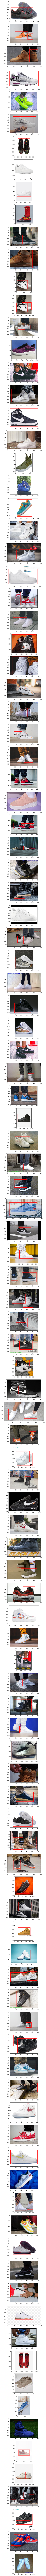

In [6]:
fig, axes = plt.subplots(len(imgs),1,figsize=(300,300))
fig.tight_layout()
axes = axes.flatten()

for idx in range(len(imgs)):
    img = plt.imread(imgs[idx]['file'])
    axes[idx].imshow(img)       
    for bbox in imgs[idx]['bboxes']:
        xmin = bbox['xmin']
        xmax = bbox['xmax']
        ymin = bbox['ymin']
        ymax = bbox['ymax']
 
        rect = Rectangle((xmin,ymin),xmax-xmin,ymax-ymin,linewidth=1,edgecolor='r',facecolor='none')
        axes[idx].add_patch(rect)
